This file prepared inmput data for HW1 from this paper https://arxiv.org/pdf/astro-ph/0507515.pdf Blustin et al. 2005

In [2]:
import pandas as pd
import pylab as pl
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
grb050525A = pd.read_csv("grb050525A_all.dat", sep=" ", header=None, names=[
    "filter", "time", "exposure", "mag", "magerr", "flux", "fluxerr", "None"], index_col=None)

In [7]:
grb050525A[["time","mag", "filter"]][60:90]

,time,mag,filter
60,215,13.70,U
61,299,14.08,U
62,419,14.47,U
63,890,15.29,U
64,975,15.32,U
65,12019,17.66,U
66,468,14.71,U
67,552,14.97,U
68,637,15.01,U
69,721,15.14,U


In [37]:
def linint(x, mag, earlier, later):
    x0 = earlier.logtime.values[-1]
    x1 = later.logtime.values[0]
    y0 = earlier.mag.values[-1]
    y1 = later.mag.values[0]
    y = y0 + (x - x0) * (y1 - y0) / (x1 - x0) 
    magdiff = (y - mag)
    return magdiff

In [38]:
mpl.colors.to_rgba("r", alpha=1)


(1.0, 0.0, 0.0, 1)

In [39]:
grb050525A["flux"] = pd.to_numeric(grb050525A["flux"], errors="coerce")
grb050525A["mag"] = pd.to_numeric(grb050525A["mag"], errors="coerce")
grb050525A["newmag"] = grb050525A["mag"]
grb050525A["uplimmag"] = np.nan * len(grb050525A)
grb050525A.loc[grb050525A[grb050525A.mag.isna()].index, "uplimmag"] = \
    grb050525A[grb050525A.mag.isna()].magerr
grb050525A["color"] = grb050525A["filter"].map({"V":"r", "B":"m", "U":"c", "W1":"purple", 
                                                "M2":"b", "W2":"k"})
grb050525A["upperlimit"] = [0] * len(grb050525A)

grb050525A.loc[grb050525A["mag"].isna(),  "upperlimit"] = 1

grb050525A["rgbcolor"] = grb050525A["color"].apply(lambda x: mpl.colors.to_rgba(x, 0.5))
grb050525A["logtime"] = np.log10(grb050525A["time"])
grb050525A["logflux"] = np.log10(grb050525A["flux"])

for c in grb050525A["filter"].unique():
    if c == "V": continue
    t0 = grb050525A[grb050525A["filter"] == c].logtime.values[0] 
    m0 = grb050525A[grb050525A["filter"] == c].mag.values[0]
    later = grb050525A[grb050525A["filter"] == "V"][
        grb050525A[grb050525A["filter"] == "V"].logtime > t0]
    earlier = grb050525A[grb050525A["filter"] == "V"][
        grb050525A[grb050525A["filter"] == "V"].logtime < t0]
    #print (t0, "\n", later, earlier)
    mdiff = linint(t0, m0, earlier, later)
    ind = grb050525A[grb050525A["filter"] == c].index
    grb050525A.loc[ind, "newmag"] += mdiff 
    grb050525A.loc[ind, "uplimmag"] -= mdiff 

#for f in grb050525A["mag"].values

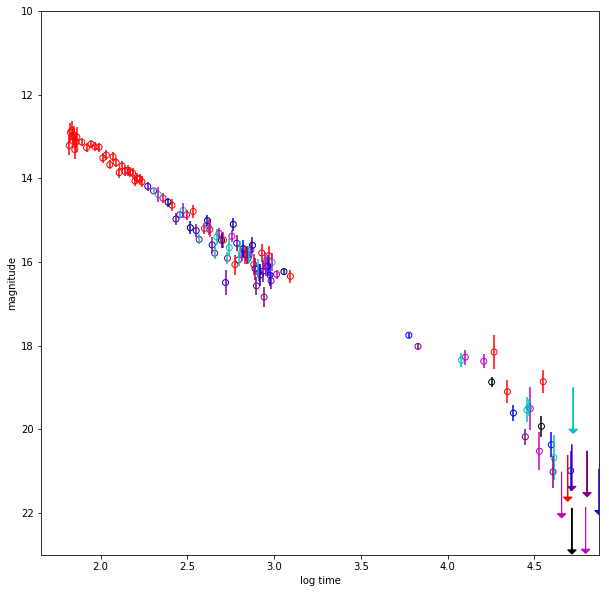

In [40]:
pl.figure(figsize=(10,10))
ind = grb050525A.magerr > 0#(grb050525A["filter"] == "V")+ (grb050525A["filter"]  == "B") + \
      #     (grb050525A["filter"]  == "U")
pl.errorbar(grb050525A["logtime"], grb050525A["newmag"], 
            alpha=1, yerr=grb050525A["magerr"], fmt='.', ms=0,
            ecolor=grb050525A["color"], fcolor=None)
pl.scatter(grb050525A["logtime"], grb050525A["newmag"], alpha=1, 
           edgecolor=grb050525A["color"], facecolors='none')
nuplim = grb050525A.mag.isna().sum()
for i in grb050525A[grb050525A.mag.isna()].index:
    pl.arrow(grb050525A.loc[i].logtime, 
         grb050525A.loc[i].uplimmag, 0, 1, fc=grb050525A.loc[i].color,
            head_width=0.05, head_length=0.1, ec=grb050525A.loc[i].color)
pl.ylim(23,10)
pl.ylabel("magnitude")
pl.xlabel("log time");

In [41]:
grb050525A[["filter", "time", "newmag", 
            "magerr", "upperlimit" ]]


,filter,time,newmag,magerr,upperlimit
0,V,66,13.210000,0.24,0
1,V,67,12.900000,0.23,0
2,V,68,12.860000,0.23,0
3,V,69,13.010000,0.23,0
4,V,70,12.970000,0.23,0
5,V,71,13.310000,0.23,0
6,V,72,13.130000,0.23,0
7,V,73,13.010000,0.23,0
8,V,78,13.130000,0.10,0
9,V,83,13.260000,0.10,0


In [42]:
grb050525A[["filter", "time", "newmag", 
            "magerr", "upperlimit" ]].rename({"newmag":"mag"}, 
                axis=1).sort_values(by="time").to_csv("grb050525A.csv", index=False)